# Cross-Validation Grid Search with Random Forest

# PROBLEM STATEMENT 6

In [1]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [5]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['Unnamed: 0',
 'LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [8]:
dict = {
        'max_depth': [3,6,9,12],
        'n_estimators': [10,50,100,200]
        }

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [14]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rf, param_grid=dict, scoring='roc_auc',
                        n_jobs=None, iid=False, refit=True, cv=4, verbose=2,
                        pre_dispatch=None, error_score=np.nan, return_train_score=True)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [15]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  2.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [16]:
cv_result = pd.DataFrame(cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.141644,0.004044,0.007473,0.000480,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.738783,0.748145,0.771602,0.770049,0.757145,0.014086,15,0.767249,0.763871,0.759446,0.763068,0.763409,0.002774
1,0.673279,0.003250,0.021955,0.000992,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.745615,0.753735,0.777552,0.770183,0.761771,0.012703,14,0.772152,0.772680,0.764858,0.767190,0.769220,0.003306
2,1.293437,0.008094,0.040397,0.002209,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.747900,0.753316,0.779014,0.770191,0.762605,0.012543,13,0.774546,0.773914,0.765627,0.767860,0.770487,0.003832
3,2.571781,0.007444,0.074026,0.000375,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.747901,0.753805,0.778778,0.770831,0.762829,0.012477,12,0.774658,0.774190,0.766107,0.768629,0.770896,0.003643
4,0.230907,0.004114,0.008225,0.000282,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.752031,0.757401,0.781310,0.779324,0.767516,0.012960,10,0.802970,0.801382,0.795174,0.796326,0.798963,0.003287
5,1.138244,0.009638,0.026893,0.000501,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.760047,0.764963,0.786419,0.778733,0.772541,0.010541,8,0.807422,0.806458,0.799496,0.802614,0.803997,0.003161
6,2.246900,0.014056,0.049571,0.000356,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.759838,0.765809,0.787997,0.780100,0.773436,0.011175,6,0.808329,0.807295,0.801604,0.803504,0.805183,0.002738
7,4.483365,0.022548,0.096884,0.003495,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.759978,0.765143,0.787027,0.781140,0.773322,0.011112,7,0.808427,0.807817,0.801989,0.804671,0.805726,0.002586
8,0.315389,0.003469,0.009580,0.000109,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.756252,0.758783,0.778104,0.776635,0.767443,0.009980,11,0.859933,0.853045,0.851456,0.854284,0.854679,0.003194
9,1.567554,0.009300,0.033130,0.000239,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.763338,0.764628,0.789646,0.779004,0.774154,0.010854,4,0.870824,0.870648,0.869675,0.869811,0.870240,0.000503


**Find the best hyperparameters from the cross-validation.**

In [19]:
cv.best_params_

{'max_depth': 9, 'n_estimators': 200}

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [20]:
# Create a 5x5 grid
mean_test_score = cv_result['mean_test_score'].values.reshape(4,4)
mean_test_score

array([[0.7571446 , 0.76177139, 0.76260542, 0.76282869],
       [0.76751635, 0.77254054, 0.77343598, 0.77332218],
       [0.76744342, 0.77415385, 0.7755178 , 0.77599005],
       [0.75530759, 0.77139779, 0.77389581, 0.7748405 ]])

In [24]:
# Set color map to `plt.cm.jet`
xx, yy = np.meshgrid(range(5), range(5))


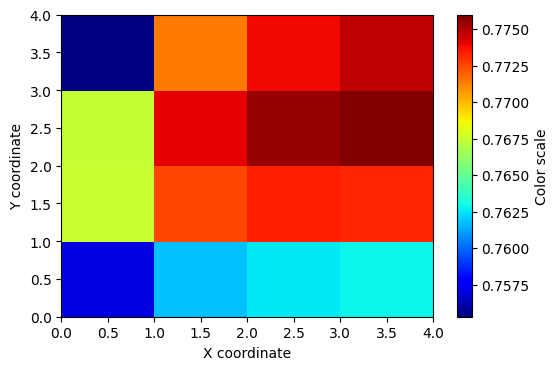

In [27]:
# Visualize pcolormesh
plt.figure(dpi=100)
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx, yy, mean_test_score, cmap=plt.cm.jet)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
plt.show()

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [28]:
# Create a dataframe of the feature names and importance
feat_imp_df = pd.DataFrame({'Features': features_response[:-1], 'Importance': cv.best_estimator_.feature_importances_})
feat_imp_df

,Features,Importance
0,Unnamed: 0,0.030409
1,LIMIT_BAL,0.060288
2,EDUCATION,0.006630
3,MARRIAGE,0.004462
4,AGE,0.025852
5,PAY_1,0.421393
6,BILL_AMT1,0.041345
7,BILL_AMT2,0.039652
8,BILL_AMT3,0.037103
9,BILL_AMT4,0.034524


In [29]:
# Sort values by importance
feat_imp_df.sort_values('Importance', ascending = False)

,Features,Importance
5,PAY_1,0.421393
1,LIMIT_BAL,0.060288
12,PAY_AMT1,0.058400
13,PAY_AMT2,0.049242
6,BILL_AMT1,0.041345
14,PAY_AMT3,0.040954
7,BILL_AMT2,0.039652
8,BILL_AMT3,0.037103
9,BILL_AMT4,0.034524
15,PAY_AMT4,0.033137
